<a href="https://colab.research.google.com/github/cristiansayers/PChem-2-DFT-Lab/blob/main/.Quantum_Espresso_Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt update
!sudo apt upgrade
!sudo apt install --no-install-recommends \
    libfftw3-dev \
    quantum-espresso

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,383 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,824 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-se

In [ ]:
!git clone https://github.com/cristiansayers/PChem-2-DFT-Lab.git

Cloning into 'PChem-2-DFT-Lab'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 84 (delta 31), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 2.87 MiB | 6.51 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [ ]:
!pip install colab-xterm
%load_ext colabxterm
%xterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 2.2 MB/s eta 0:00:00


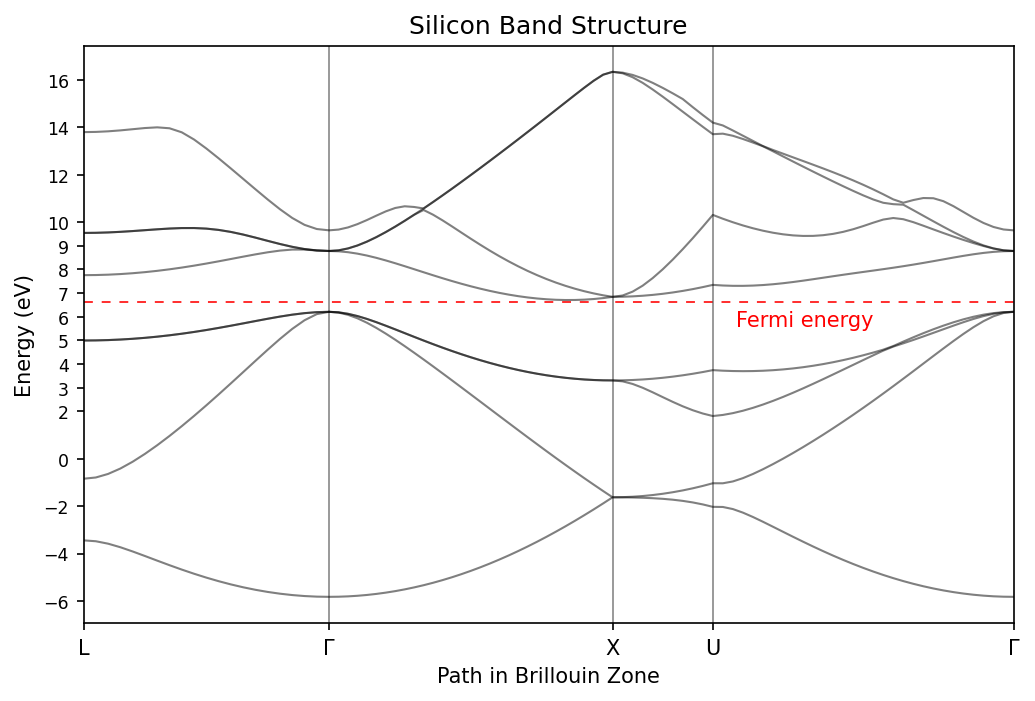

In [52]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

plt.rcParams.update(rcParamsDefault)
large = 22; med = 14; small = 10

plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 5)

data = np.loadtxt('espresso/src/silicon/si_bands.dat.gnu')

k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

for band in range(len(bands)):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.5, color='k')
plt.xlim(min(k), max(k))

# Fermi energy
plt.axhline(6.6416, linestyle=(0, (5, 5)), linewidth=0.85, color='red', alpha=0.9)
# High symmetry k-points (check bands_pp.out)
plt.axvline(0.8660, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1.8660, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(2.2196, linewidth=0.75, color='k', alpha=0.5)
# text labels
plt.xticks(ticks= [0, 0.8660, 1.8660, 2.2196, 3.2802], \
           labels=['L', '$\Gamma$', 'X', 'U', '$\Gamma$'])
plt.ylabel("Energy (eV)")
plt.yticks(ticks=[-6,-4,-2,0,2,3,4,5,6,7,8,9,10,12,14,16], fontsize='small' )
plt.title("Silicon Band Structure")
plt.xlabel("Path in Brillouin Zone")
plt.text(2.3, 5.6, 'Fermi energy', fontsize= small, color='red')
plt.show()

In [19]:
!pip install markdown-analysis


In [26]:
from mrkdwn_analysis import MarkdownAnalyzer

analyzer = MarkdownAnalyzer("espresso/docs/theory/dft.md")

header = analyzer.identify_headers()

In [18]:
import pandas as pd
pd.read_hdf("espresso/docs/theory/dft.md")

print("espresso/docs/theory/dft.md")

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 836, in H5Fopen
    unable to synchronously open file
  File "H5F.c", line 796, in H5F__open_api_common
    unable to open file
  File "H5VLcallback.c", line 3863, in H5VL_file_open
    open failed
  File "H5VLcallback.c", line 3675, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 128, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 2018, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 392, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file 'espresso/docs/theory/dft.md'